In [6]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
%%markdown
# software reliability test

# software reliability test


In [8]:
fa = pd.read_csv('../datasets/failure_times.txt', header=None)
fa.columns = ['time']

In [9]:
# How often do failures happen?
# Calculate average time between failures, present the answer with two decimal points.
fa['time_shifted'] = fa.time.shift(1)
fa['dif'] = fa.time - fa.time_shifted

np.round(np.mean(fa.time - fa.time_shifted),2)

656.88

In [10]:
# Calculate 95% confidence interval for the mean time between failures based on asymptotic normality of the sample mean.
# What is its upper bound? Round the answer to 2 decimal points.

fa = fa.dropna()

# 95% conf interval
conf_int = np.round(sms.DescrStatsW(fa.dif).tconfint_mean(), 2)

# upper bound
conf_int[1]

833.45

In [11]:
# Calculate 95% confidence interval for the mean time between failures based on asymptotic normality of the sample mean.
# What is its upper bound? Round the answer to 2 decimal points.

# boostrapping
def get_bootstrap_samples(x, n_resamples):
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples

def percentile_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# random seed 0 to replicate the result
np.random.seed(0)

# boot strapping samples
failure_mean_scores = list(map(np.mean, get_bootstrap_samples(fa.dif.values, 10000)))

# finding 95% conf. interval 
conf_int = np.round(percentile_interval(failure_mean_scores, 0.05),2)

# upper bound
conf_int[1]


838.16

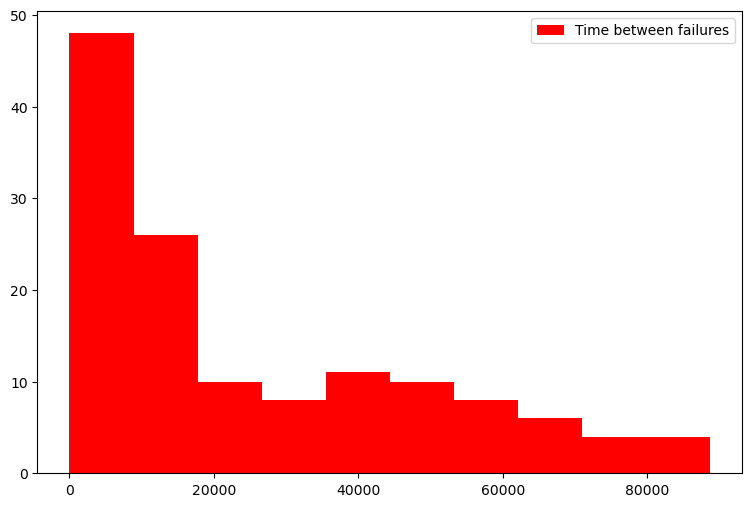

In [12]:
# The intervals are quite similar, which is good, but if you have to choose one of them – which do you think is more correct to use for this problem?
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist(fa.time, color = 'r', range = (min(fa.time), max(fa.time)), label = 'Time between failures')
plt.legend()
plt.show()

# Answer -> bootstrap, because the distribution of the variable has heavy right tail (nowhere near normal distriubtion)

In [13]:
%%markdown
# water hardness and mortality

# water hardness and mortality


In [14]:
wa = pd.read_csv("../datasets/water.txt", sep='\t')
wa

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [15]:
# 95 conf interval for mortality
conf_int = np.round(sms.DescrStatsW(wa.mortality).tconfint_mean(), 4)

# lower bound
conf_int[0]

1476.0833

In [16]:
# Build a 95% confidence interval for mortality rate in southern cities.

was = wa[wa['location'] == 'South']

# conf int
conf_int_south = np.round(sms.DescrStatsW(was.mortality).tconfint_mean(), 4)

# upper bound
conf_int_south[1]

1433.4636

In [17]:
# Build a 95% confidence interval for mortality in northern cities. Do two intervals – for southern and nothern cities – overlap? 
# What do you think could be concluded from it?

wan = wa[wa['location'] == 'North']

# conf int
conf_int_north = np.round(sms.DescrStatsW(wan.mortality).tconfint_mean(), 4)

# check overlap
print(f"South 95% conf. int.: {conf_int_south}\nNorth 95% conf. int.: {conf_int_north}")


South 95% conf. int.: [1320.1517 1433.4636]
North 95% conf. int.: [1586.5605 1680.6395]


In [18]:
# Do 95% confidence intervals for average water hardness in southern and northern cities overlap?

conf_int_south = np.round(sms.DescrStatsW(was.hardness).tconfint_mean(), 4)
conf_int_north = np.round(sms.DescrStatsW(wan.hardness).tconfint_mean(), 4)
print(f"South 95% conf. int.: {conf_int_south}\nNorth 95% conf. int.: {conf_int_north}")


South 95% conf. int.: [53.4672 86.0713]
North 95% conf. int.: [21.4225 39.3775]


In [19]:
%%markdown
# challenger test

# challenger test


In [20]:
# challenger
cha = pd.read_csv('../datasets/challenger.txt', sep='\t')
cha.columns = ['date', 'temp', 'inc']

# opt 1
print('opt1', np.round(cha[cha['inc'] == 0]['temp'].mean() - cha[cha['inc'] == 1]['temp'].mean(),4))

# opt 2
temps = cha.groupby('inc').agg({'temp' : np.mean}).reset_index()['temp'].to_list()
print('opt2', np.round(temps[0] - temps[1],4))

opt1 4.667
opt2 4.667


In [21]:
# Using percentile bootstrap, build 95% confidence interval for the difference between mean air temperatures for launches with and without O-ring failures.
#  What is its' bound closes to 0? Round the answer to 4 decimal points. If you want to get exactly the same results as we did:
# use get_bootstrap_samples and percentile_interval functions from the example notebook
# set random seed = 0 before calling get_bootstrap_samples, once
# use 5000 bootstrap resamples from each sample

cha_f = cha[cha.inc == 1]
cha_s = cha[cha.inc == 0]

np.random.seed(0)

scores_f = get_bootstrap_samples(x=cha_f.temp.values, n_resamples=5000)
scores_s = get_bootstrap_samples(x=cha_s.temp.values, n_resamples=5000)

score_dif = np.mean(scores_s,axis=1) - np.mean(scores_f, axis=1)

conf_int = percentile_interval(score_dif, 0.05)

print(f'95% conf interval: {np.round(conf_int, 4)}')

95% conf interval: [1.2767 7.9769]


In [22]:
water = pd.read_csv('../datasets/water.txt', sep='\t', header=0)
water_s = water[water['location'] == 'South']


np.round(sms.DescrStatsW(water_s.mortality).tconfint_mean(), 4)[1]

1433.4636